# Sliding window $\chi^2$ results on the ASCAD database.

In [1]:
from tools.cache import cache_np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [43]:
CHI_P_SW_ORIG = cache_np('sliding_window_chi_p_all')
CHI_P_SW = np.moveaxis(CHI_P_SW_ORIG, 0, -1)

In [3]:
CHI_P_SW.shape

(256, 256, 270)

In [4]:
NUM_KEYS = CHI_P_SW.shape[0]

SW_EQ = np.array([CHI_P_SW[i][i] for i in range(NUM_KEYS)])
SW_NEQ = np.array([CHI_P_SW[i][j] for i in range(NUM_KEYS) for j in range(NUM_KEYS) if i != j])

In [69]:
SW_STEP = 5
SW_SIZE = 50
SW_PADDING = [np.nan] * round(SW_SIZE / 2)

def plot_diff(f, log=False, poi=None):
    eq = np.array([*SW_PADDING, *f(SW_EQ, axis=0).repeat(SW_STEP)])
    neq = np.array([*SW_PADDING, *f(SW_NEQ, axis=0).repeat(SW_STEP)])

    data = {"p-value equal key": eq, "p-value different key": neq}
    if poi is not None:
        for k in data:
            data[k] = data[k][poi[0]:poi[1]]

    sns_plt = sns.lineplot(data=data)

    ax = sns_plt.axes
    if log:
        ax.set_yscale('log')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=2)

def plot_diff_threshold(thresh=.01, poi=None):
    eq = np.array([*SW_PADDING, *np.sum(np.less(SW_EQ, thresh), axis=0).repeat(SW_STEP)])
    neq = np.array([*SW_PADDING, *np.sum(np.less(SW_NEQ, thresh), axis=0).repeat(SW_STEP)]) / (NUM_KEYS - 1)

    data = {f"Equal key, $\Sigma$(p < {thresh})": eq, f"Different key, $\Sigma$(p < {thresh})": neq}
    if poi:
        for k in data:
            data[k] = data[k][poi[0]:poi[1]]

    sns_plt = sns.lineplot(data=data)
    ax = sns_plt.axes
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=2)

### $p$-values for $\chi^2$ under different distributions.

For different p-value selection methods.

*Small $p$-values give evidence to reject $H_0$ and conclude that for these scenarios the
occurrences of the observations are not independent*

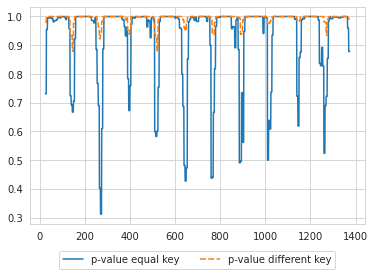

In [6]:
plot_diff(np.max)

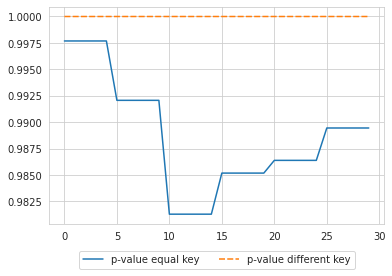

In [57]:
plot_diff(np.max, poi=(50, 80))

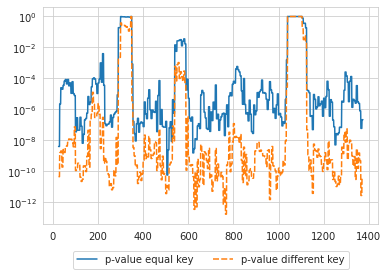

In [8]:
plot_diff(np.min, log=True)

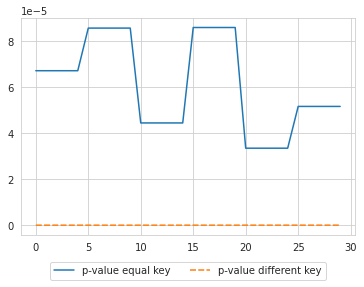

In [61]:
plot_diff(np.min, poi=(50, 80))

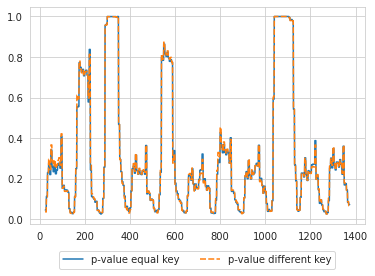

In [9]:
plot_diff(np.mean)

### For p-values that meet a certain threshold

Number of $\chi^2$-tests below threshold value, adjusted for number of tests performed.

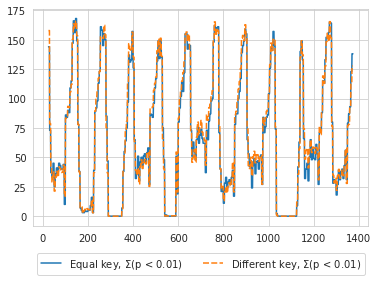

In [70]:
plot_diff_threshold()

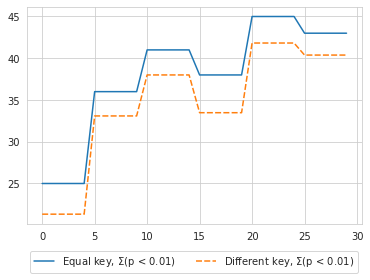

In [71]:
plot_diff_threshold(poi=(50, 80))